## Memprediksi Harga Saham Dengan SVM 

In [1]:
import datetime as dt
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 

In [4]:
df = pd.read_csv('BBRI-monthly.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-01,960.0,1080.0,935.0,1000.0,374.679871,3050570000
1,2010-10-01,1005.0,1190.0,985.0,1140.0,427.134979,2491565000
2,2010-11-01,1210.0,1280.0,1050.0,1050.0,393.413879,2589070000
3,2010-12-01,1085.0,1170.0,980.0,1050.0,393.413879,3709020000
4,2011-01-01,1035.0,1080.0,905.0,970.0,380.489014,6471570000


In [13]:
data = df.copy()
dates = pd.to_numeric(data.index).tolist()
prices = pd.to_numeric(data['Close']).tolist() 

print(dates)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]


### Note:
Karena sklearn ga bisa pakai date, jadi pakai index untuk niali X nya, <br>
dan datanya ga terlalu banyak, laptop ga kuat train data banyak2 :D

In [11]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_rbf = SVR(kernel='rbf', C=1e3)
    
    # Fit regression model
    svr_lin .fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    lin = svr_lin.predict(dates)
    rbf = svr_rbf.predict(dates)
    
    date2 = np.append(dates, x)
    rbfp = svr_rbf.predict(x)[0]
    linp = svr_lin.predict(x)[0]
    
    lin2 = np.append(lin, linp)
    rbf2 = np.append(rbf, rbfp)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(date2, lin2, c='g', label='Linear model')
    plt.plot(date2, rbf2, c='r', label='RBF model')    
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return rbfp, linp

Memprediksi harga, menggunakan metode liniar dan RBF

/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


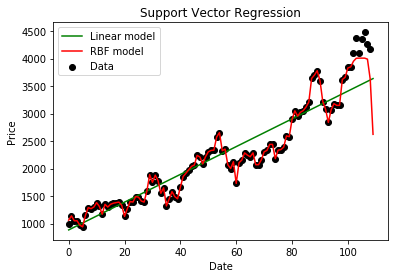

In [14]:
lastDay = len(dates)
predicted_price = predict_prices(dates, prices, [lastDay])

In [15]:
print(predicted_price)

(2622.933670280504, 3637.0827586328637)
